<a href="https://colab.research.google.com/github/suyogk23/ipl-prediction-models-STARC/blob/main/multivariateTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MULTIVARIATE TS MODEL

STEPS:

Preprocessing data(check for stationarity)

Fit the Model

Predict values on validation set

Calculate RMSE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fPath='https://drive.google.com/file/d/1PTLuSKmZz8c8ypIQywydDPasWCoGTgq1/view?usp=drive_link'
df=pd.read_csv('ipl_data_s.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
#We will encode all the team names and stadium names, then perform correlation analysis
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [ ]:
#dropping unrequired columns
df=df.drop(columns=['date','striker','non-striker','total'])

In [ ]:
df.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5
0,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0
1,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.2,1,0
2,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.2,2,0
3,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.3,2,0
4,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.4,2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
df['venue'] = label_encoder.fit_transform(df['venue'])
mapping_venue = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['bat_team'] = label_encoder.fit_transform(df['bat_team'])
mapping_bat_team = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['bowl_team'] = label_encoder.fit_transform(df['bowl_team'])
mapping_bowl_team = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['batsman'] = label_encoder.fit_transform(df['batsman'])
mapping_batsman = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['bowler'] = label_encoder.fit_transform(df['bowler'])
mapping_bowler = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
print(mapping_venue)
print()
print(mapping_bat_team)
print()
print(mapping_bowl_team)
print()
print(mapping_batsman)
print()
print(mapping_bowler)

{'Barabati Stadium': 0, 'Brabourne Stadium': 1, 'Buffalo Park': 2, 'De Beers Diamond Oval': 3, 'Dr DY Patil Sports Academy': 4, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 5, 'Dubai International Cricket Stadium': 6, 'Eden Gardens': 7, 'Feroz Shah Kotla': 8, 'Green Park': 9, 'Himachal Pradesh Cricket Association Stadium': 10, 'Holkar Cricket Stadium': 11, 'JSCA International Stadium Complex': 12, 'Kingsmead': 13, 'M Chinnaswamy Stadium': 14, 'MA Chidambaram Stadium, Chepauk': 15, 'Maharashtra Cricket Association Stadium': 16, 'Nehru Stadium': 17, 'New Wanderers Stadium': 18, 'Newlands': 19, 'OUTsurance Oval': 20, 'Punjab Cricket Association IS Bindra Stadium, Mohali': 21, 'Punjab Cricket Association Stadium, Mohali': 22, 'Rajiv Gandhi International Stadium, Uppal': 23, 'Sardar Patel Stadium, Motera': 24, 'Saurashtra Cricket Association Stadium': 25, 'Sawai Mansingh Stadium': 26, 'Shaheed Veer Narayan Singh International Stadium': 27, 'Sharjah Cricket Stadium': 28, 'Sheikh Za

In [ ]:
correlationMatrix = df.corr()
print(correlationMatrix)

                     mid     venue  bat_team  bowl_team   batsman    bowler  \
mid             1.000000  0.015417  0.238576   0.116078 -0.125836 -0.031705   
venue           0.015417  1.000000  0.103630   0.071646 -0.028619 -0.033610   
bat_team        0.238576  0.103630  1.000000  -0.101522 -0.037807 -0.009818   
bowl_team       0.116078  0.071646 -0.101522   1.000000 -0.024533 -0.010858   
batsman        -0.125836 -0.028619 -0.037807  -0.024533  1.000000  0.020676   
bowler         -0.031705 -0.033610 -0.009818  -0.010858  0.020676  1.000000   
runs            0.026470 -0.017332 -0.002888  -0.006677 -0.020136 -0.007101   
wickets        -0.055220  0.001760 -0.028283  -0.006456 -0.015948  0.003222   
overs           0.002487  0.001402  0.001484  -0.002832 -0.027690 -0.001948   
runs_last_5     0.045320 -0.021245  0.004459  -0.011057 -0.002695  0.001553   
wickets_last_5 -0.031886 -0.000673 -0.016499   0.005044 -0.000165  0.007116   

                    runs   wickets     overs  runs_

In [ ]:
dfWithLast5=df

In [ ]:
df=df.drop(columns=['runs_last_5','wickets_last_5'])


In [ ]:
#df=df.drop(columns=['mid'])
df.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
0,1,14,6,12,315,201,1,0,0.1
1,1,14,6,12,315,201,1,0,0.2
2,1,14,6,12,315,201,2,0,0.2
3,1,14,6,12,315,201,2,0,0.3
4,1,14,6,12,315,201,2,0,0.4


In [ ]:
import plotly.express as px

In [ ]:
newDf=df

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

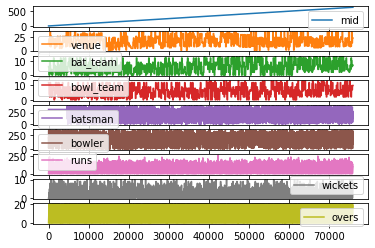

In [ ]:
df.plot(subplots=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test


In [ ]:
adf_test(df['runs'])

Results of Dickey-Fuller Test:
Test Statistic                   -47.877450
p-value                            0.000000
#Lags Used                        64.000000
Number of Observations Used    75949.000000
Critical Value (1%)               -3.430436
Critical Value (5%)               -2.861578
Critical Value (10%)              -2.566790
dtype: float64


In [ ]:
adf_test(df['wickets'])

Results of Dickey-Fuller Test:
Test Statistic                   -35.432683
p-value                            0.000000
#Lags Used                        56.000000
Number of Observations Used    75957.000000
Critical Value (1%)               -3.430436
Critical Value (5%)               -2.861578
Critical Value (10%)              -2.566790
dtype: float64


hence we conlude data is stationary

VAR - MULTIVARIATE TS IMPLEMENTATION

In [ ]:
#we need to predict projected score which is based on team, players, wicket, venue
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=df.drop(columns=['mid'])

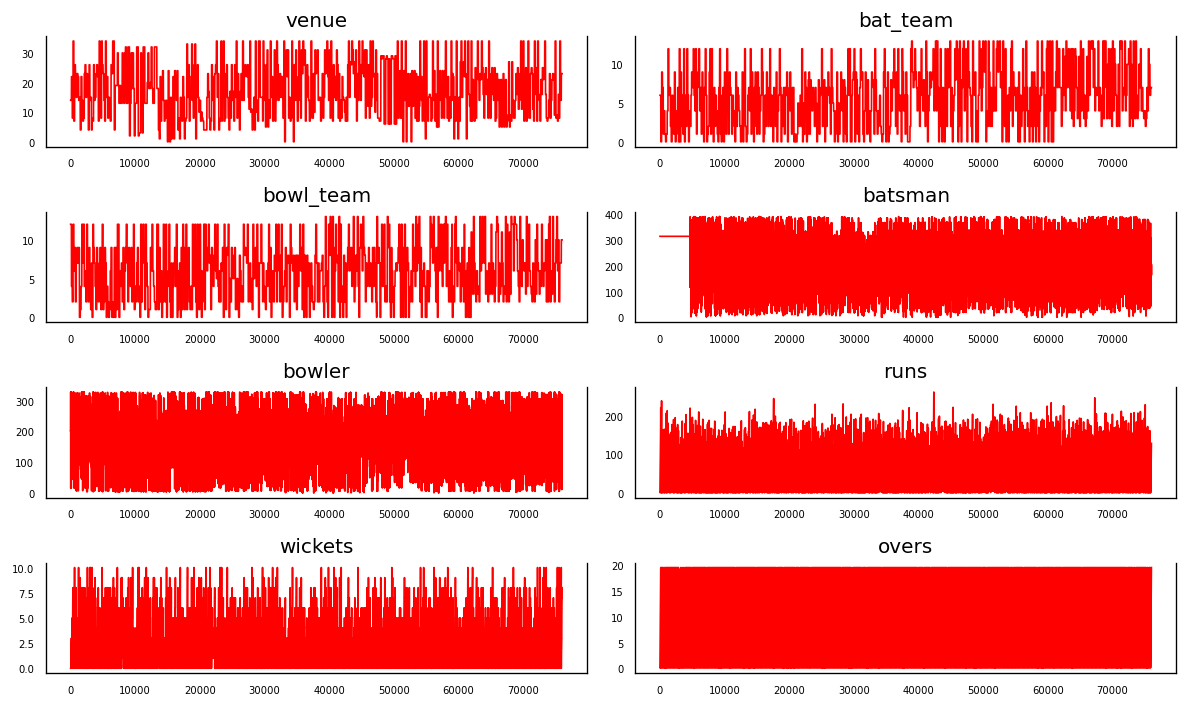

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
#CORRELATION ANALYSIS - granger causality tests
print('overs causes runs?') #trivial test
print('------------------')
granger_1 = grangercausalitytests(df[['runs', 'overs']], 18)
#18 lags used for now (3 overs)

overs causes runs?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.8841 , p=0.0003  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=12.8846 , p=0.0003  , df=1
likelihood ratio test: chi2=12.8835 , p=0.0003  , df=1
parameter F test:         F=12.8841 , p=0.0003  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.6566 , p=0.0000  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=31.3153 , p=0.0000  , df=2
likelihood ratio test: chi2=31.3089 , p=0.0000  , df=2
parameter F test:         F=15.6566 , p=0.0000  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.4966 , p=0.0000  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=46.4941 , p=0.0000  , df=3
likelihood ratio test: chi2=46.4799 , p=0.0000  , df=3
parameter F test:         F=15.4966 , p=0.0000  , df_denom=76004, df_num=3

Granger Causality
number of lags (no zero) 

In [ ]:
print('wickets causes runs?')
print('------------------')
granger_1 = grangercausalitytests(df[['runs', 'wickets']], 18)
#18 lags used for now (3 overs)

wickets causes runs?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=455.9110, p=0.0000  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=455.9290, p=0.0000  , df=1
likelihood ratio test: chi2=454.5671, p=0.0000  , df=1
parameter F test:         F=455.9110, p=0.0000  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=270.1952, p=0.0000  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=540.4259, p=0.0000  , df=2
likelihood ratio test: chi2=538.5138, p=0.0000  , df=2
parameter F test:         F=270.1952, p=0.0000  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=185.0284, p=0.0000  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=555.1364, p=0.0000  , df=3
likelihood ratio test: chi2=553.1190, p=0.0000  , df=3
parameter F test:         F=185.0284, p=0.0000  , df_denom=76004, df_num=3

Granger Causality
number of lags (no zero

In [ ]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
0,14,6,12,315,201,1,0,0.1
1,14,6,12,315,201,1,0,0.2
2,14,6,12,315,201,2,0,0.2
3,14,6,12,315,201,2,0,0.3
4,14,6,12,315,201,2,0,0.4


In [ ]:
print('venue causes runs?') #no
print('------------------')
granger_1 = grangercausalitytests(df[['runs', 'venue']], 18)
#18 lags used for now (3 overs)
#p value >  .05 >>> HYPOTHESIS REJECTED

venue causes runs?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4810  , p=0.4880  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=0.4810  , p=0.4880  , df=1
likelihood ratio test: chi2=0.4810  , p=0.4880  , df=1
parameter F test:         F=0.4810  , p=0.4880  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2498  , p=0.7789  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=0.4997  , p=0.7789  , df=2
likelihood ratio test: chi2=0.4997  , p=0.7789  , df=2
parameter F test:         F=0.2498  , p=0.7789  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1733  , p=0.9145  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=0.5198  , p=0.9145  , df=3
likelihood ratio test: chi2=0.5198  , p=0.9145  , df=3
parameter F test:         F=0.1733  , p=0.9145  , df_denom=76004, df_num=3

Granger Causality
number of lags (no zero) 

In [ ]:
print('venu causes wickets?')
print('------------------')
granger_1 = grangercausalitytests(df[['wickets', 'venue']], 18)
#18 lags used for now (3 overs)
#NO

venu causes wickets?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0099  , p=0.9209  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=0.0099  , p=0.9209  , df=1
likelihood ratio test: chi2=0.0099  , p=0.9209  , df=1
parameter F test:         F=0.0099  , p=0.9209  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0086  , p=0.9914  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=0.0172  , p=0.9914  , df=2
likelihood ratio test: chi2=0.0172  , p=0.9914  , df=2
parameter F test:         F=0.0086  , p=0.9914  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0260  , p=0.9943  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=0.0780  , p=0.9943  , df=3
likelihood ratio test: chi2=0.0780  , p=0.9943  , df=3
parameter F test:         F=0.0260  , p=0.9943  , df_denom=76004, df_num=3

Granger Causality
number of lags (no zero

In [ ]:
print('bat_team causes runs?')
print('------------------')
granger_1 = grangercausalitytests(df[['runs', 'bat_team']], 30)
#30 lags used for now (5 overs)
#NO

bat_team causes runs?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0112  , p=0.9159  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=0.0112  , p=0.9159  , df=1
likelihood ratio test: chi2=0.0112  , p=0.9159  , df=1
parameter F test:         F=0.0112  , p=0.9159  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0070  , p=0.9930  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=0.0140  , p=0.9930  , df=2
likelihood ratio test: chi2=0.0140  , p=0.9930  , df=2
parameter F test:         F=0.0070  , p=0.9930  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0065  , p=0.9993  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=0.0196  , p=0.9993  , df=3
likelihood ratio test: chi2=0.0196  , p=0.9993  , df=3
parameter F test:         F=0.0065  , p=0.9993  , df_denom=76004, df_num=3

Granger Causality
number of lags (no zer

ssr based F test:         F=0.0117  , p=1.0000  , df_denom=75929, df_num=28
ssr based chi2 test:   chi2=0.3271  , p=1.0000  , df=28
likelihood ratio test: chi2=0.3271  , p=1.0000  , df=28
parameter F test:         F=0.0117  , p=1.0000  , df_denom=75929, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=0.0124  , p=1.0000  , df_denom=75926, df_num=29
ssr based chi2 test:   chi2=0.3609  , p=1.0000  , df=29
likelihood ratio test: chi2=0.3609  , p=1.0000  , df=29
parameter F test:         F=0.0124  , p=1.0000  , df_denom=75926, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.0123  , p=1.0000  , df_denom=75923, df_num=30
ssr based chi2 test:   chi2=0.3693  , p=1.0000  , df=30
likelihood ratio test: chi2=0.3693  , p=1.0000  , df=30
parameter F test:         F=0.0123  , p=1.0000  , df_denom=75923, df_num=30


In [ ]:
print('bat_team causes wickets?')
print('------------------')
granger_1 = grangercausalitytests(df[['wickets', 'bat_team']], 18)
#18 lags used for now (3 overs)
#NO

bat_team causes wickets?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4815  , p=0.2235  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=1.4815  , p=0.2235  , df=1
likelihood ratio test: chi2=1.4815  , p=0.2235  , df=1
parameter F test:         F=1.4815  , p=0.2235  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7337  , p=0.4801  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=1.4675  , p=0.4801  , df=2
likelihood ratio test: chi2=1.4675  , p=0.4801  , df=2
parameter F test:         F=0.7337  , p=0.4801  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5464  , p=0.6505  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=1.6394  , p=0.6505  , df=3
likelihood ratio test: chi2=1.6393  , p=0.6505  , df=3
parameter F test:         F=0.5464  , p=0.6505  , df_denom=76004, df_num=3

Granger Causality
number of lags (no 

In [ ]:
print('bowl_team causes runs?')
print('------------------')
granger_1 = grangercausalitytests(df[['runs', 'bowl_team']], 18)
#18 lags used for now (3 overs)
#NO

bowl_team causes runs?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0548  , p=0.8148  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=0.0548  , p=0.8148  , df=1
likelihood ratio test: chi2=0.0548  , p=0.8148  , df=1
parameter F test:         F=0.0548  , p=0.8148  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0295  , p=0.9709  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=0.0590  , p=0.9709  , df=2
likelihood ratio test: chi2=0.0590  , p=0.9709  , df=2
parameter F test:         F=0.0295  , p=0.9709  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0234  , p=0.9952  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=0.0701  , p=0.9952  , df=3
likelihood ratio test: chi2=0.0701  , p=0.9952  , df=3
parameter F test:         F=0.0234  , p=0.9952  , df_denom=76004, df_num=3

Granger Causality
number of lags (no ze

In [ ]:
print('bowl_team causes wickets?')
print('------------------')
granger_1 = grangercausalitytests(df[['wickets', 'bowl_team']], 18)
#18 lags used for now (3 overs)
#NO

bowl_team causes wickets?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0394  , p=0.8427  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=0.0394  , p=0.8427  , df=1
likelihood ratio test: chi2=0.0394  , p=0.8427  , df=1
parameter F test:         F=0.0394  , p=0.8427  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0725  , p=0.9301  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=0.1449  , p=0.9301  , df=2
likelihood ratio test: chi2=0.1449  , p=0.9301  , df=2
parameter F test:         F=0.0725  , p=0.9301  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0499  , p=0.9853  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=0.1497  , p=0.9853  , df=3
likelihood ratio test: chi2=0.1496  , p=0.9853  , df=3
parameter F test:         F=0.0499  , p=0.9853  , df_denom=76004, df_num=3

Granger Causality
number of lags (no

In [ ]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
0,14,6,12,315,201,1,0,0.1
1,14,6,12,315,201,1,0,0.2
2,14,6,12,315,201,2,0,0.2
3,14,6,12,315,201,2,0,0.3
4,14,6,12,315,201,2,0,0.4


In [ ]:
print('batsman causes runs?')
print('------------------')
granger_1 = grangercausalitytests(df[['runs','batsman']], 18)
#18 lags used for now (3 overs)
#NO

batsman causes runs?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1576  , p=0.6914  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=0.1576  , p=0.6914  , df=1
likelihood ratio test: chi2=0.1576  , p=0.6914  , df=1
parameter F test:         F=0.1576  , p=0.6914  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1997  , p=0.8189  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=0.3995  , p=0.8189  , df=2
likelihood ratio test: chi2=0.3995  , p=0.8189  , df=2
parameter F test:         F=0.1997  , p=0.8189  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2885  , p=0.8337  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=0.8657  , p=0.8337  , df=3
likelihood ratio test: chi2=0.8657  , p=0.8337  , df=3
parameter F test:         F=0.2885  , p=0.8337  , df_denom=76004, df_num=3

Granger Causality
number of lags (no zero

In [ ]:
print('bowler causes wickets?')
print('------------------')
granger_1 = grangercausalitytests(df[['wickets', 'bowler']], 60)
#60 lags used for now (10 overs)
#NO

bowler causes wickets?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5703  , p=0.1089  , df_denom=76010, df_num=1
ssr based chi2 test:   chi2=2.5704  , p=0.1089  , df=1
likelihood ratio test: chi2=2.5704  , p=0.1089  , df=1
parameter F test:         F=2.5703  , p=0.1089  , df_denom=76010, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6109  , p=0.1997  , df_denom=76007, df_num=2
ssr based chi2 test:   chi2=3.2221  , p=0.1997  , df=2
likelihood ratio test: chi2=3.2220  , p=0.1997  , df=2
parameter F test:         F=1.6109  , p=0.1997  , df_denom=76007, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0813  , p=0.3555  , df_denom=76004, df_num=3
ssr based chi2 test:   chi2=3.2443  , p=0.3555  , df=3
likelihood ratio test: chi2=3.2442  , p=0.3555  , df=3
parameter F test:         F=1.0813  , p=0.3555  , df_denom=76004, df_num=3

Granger Causality
number of lags (no ze

ssr based F test:         F=1.4626  , p=0.0543  , df_denom=75929, df_num=28
ssr based chi2 test:   chi2=40.9832 , p=0.0539  , df=28
likelihood ratio test: chi2=40.9722 , p=0.0540  , df=28
parameter F test:         F=1.4626  , p=0.0543  , df_denom=75929, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.5128  , p=0.0378  , df_denom=75926, df_num=29
ssr based chi2 test:   chi2=43.9064 , p=0.0375  , df=29
likelihood ratio test: chi2=43.8937 , p=0.0376  , df=29
parameter F test:         F=1.5128  , p=0.0378  , df_denom=75926, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.4673  , p=0.0476  , df_denom=75923, df_num=30
ssr based chi2 test:   chi2=44.0538 , p=0.0472  , df=30
likelihood ratio test: chi2=44.0410 , p=0.0473  , df=30
parameter F test:         F=1.4673  , p=0.0476  , df_denom=75923, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.5112  , p=0.0339  , df_denom=75920, d

ssr based F test:         F=1.5876  , p=0.0036  , df_denom=75848, df_num=55
ssr based chi2 test:   chi2=87.4436 , p=0.0035  , df=55
likelihood ratio test: chi2=87.3933 , p=0.0035  , df=55
parameter F test:         F=1.5876  , p=0.0036  , df_denom=75848, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=1.5704  , p=0.0041  , df_denom=75845, df_num=56
ssr based chi2 test:   chi2=88.0736 , p=0.0040  , df=56
likelihood ratio test: chi2=88.0226 , p=0.0040  , df=56
parameter F test:         F=1.5704  , p=0.0041  , df_denom=75845, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=1.5395  , p=0.0055  , df_denom=75842, df_num=57
ssr based chi2 test:   chi2=87.8835 , p=0.0054  , df=57
likelihood ratio test: chi2=87.8327 , p=0.0054  , df=57
parameter F test:         F=1.5395  , p=0.0055  , df_denom=75842, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=1.5295  , p=0.0059  , df_denom=75839, d

In [ ]:
#only overs wickets and runs time series are affecting each other in Granger Causality Test
tsdf=df[['overs','runs','wickets']]
print(tsdf.shape)

(76014, 3)


In [ ]:
from sklearn.model_selection import train_test_split
#SPLITTING DATA
train_df, test_df = train_test_split(tsdf, test_size=0.2, random_state=42)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (60811, 3)
Test set shape: (15203, 3)


FITTING VAR MODEL

In [ ]:
#finding the lag that is best suitable
#max lag set = 120(20 overs)
model = VAR(train_df)
sorted_order=model.select_order(maxlags=120)
print(sorted_order.summary())

  VAR Order Selection (* highlights the minimums)  
        AIC         BIC         FPE         HQIC   
---------------------------------------------------
0        9.410*      9.411*  1.221e+04*      9.410*
1         9.410       9.412   1.221e+04       9.411
2         9.411       9.414   1.222e+04       9.412
3         9.411       9.415   1.222e+04       9.412
4         9.411       9.417   1.222e+04       9.413
5         9.411       9.418   1.222e+04       9.413
6         9.411       9.420   1.222e+04       9.414
7         9.411       9.421   1.223e+04       9.414
8         9.411       9.423   1.223e+04       9.415
9         9.411       9.424   1.223e+04       9.415
10        9.412       9.426   1.223e+04       9.416
11        9.412       9.427   1.223e+04       9.417
12        9.412       9.429   1.224e+04       9.417
13        9.412       9.430   1.224e+04       9.418
14        9.412       9.431   1.224e+04       9.418
15        9.413       9.433   1.224e+04       9.419
16        9.

In [ ]:
#finding the lag that is best suitable
#max lag set = 120(20 overs)
model = VAR(train_df)
sorted_order=model.select_order(maxlags=6)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      9.410*      9.410*  1.221e+04*      9.410*
1       9.410       9.412   1.221e+04       9.411
2       9.410       9.413   1.221e+04       9.411
3       9.410       9.415   1.221e+04       9.412
4       9.410       9.416   1.221e+04       9.412
5       9.411       9.418   1.222e+04       9.413
6       9.411       9.419   1.222e+04       9.413
-------------------------------------------------


In [ ]:
#MODEL IMPLEMENTATION

In [ ]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                Statespace Model Results                                
Dep. Variable:     ['overs', 'runs', 'wickets']   No. Observations:                60811
Model:                                   VAR(4)   Log Likelihood             -544946.454
                                    + intercept   AIC                        1089982.908
Date:                          Fri, 23 Jun 2023   BIC                        1090388.607
Time:                                  18:34:14   HQIC                       1090108.846
Sample:                                       0                                         
                                        - 60811                                         
Covariance Type:                            opg                                         
Ljung-Box (L1) (Q):       0.00, 0.00, 0.00   Jarque-Bera (JB):   3726.31, 12594.99, 3614.72
Prob(Q):                  1.00, 1.00, 1.00   Prob(JB):                     0.00, 0.00, 0.00
Heteroskedastic

In [ ]:
var_model = VARMAX(train_df, order=(6,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                Statespace Model Results                                
Dep. Variable:     ['overs', 'runs', 'wickets']   No. Observations:                60811
Model:                                   VAR(6)   Log Likelihood             -544939.674
                                    + intercept   AIC                        1090005.348
Date:                          Fri, 23 Jun 2023   BIC                        1090573.326
Time:                                  18:48:41   HQIC                       1090181.660
Sample:                                       0                                         
                                        - 60811                                         
Covariance Type:                            opg                                         
Ljung-Box (L1) (Q):       0.00, 0.00, 0.00   Jarque-Bera (JB):   3725.57, 12594.11, 3614.34
Prob(Q):                  1.00, 1.00, 0.99   Prob(JB):                     0.00, 0.00, 0.00
Heteroskedastic

n_forecast = len(test_df)
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [ ]:
n_forecast = len(test_df)
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
test_df.head()

,overs,runs,wickets
12590,1.2,1,2
74893,14.3,131,3
56763,6.6,36,3
19428,13.5,104,3
30216,13.3,103,4


In [ ]:
predictions.columns=['overs_predicted','runs_predicted','wickets_predicted']
predictions

,overs_predicted,runs_predicted,wickets_predicted
60811,9.867546,75.267720,2.442227
60812,9.794880,75.069236,2.406039
60813,9.798779,75.140193,2.423806
60814,9.763060,74.857690,2.417662
60815,9.874543,75.853554,2.432677
...,...,...,...
76009,9.760262,74.702855,2.412361
76010,9.760262,74.702855,2.412361
76011,9.760262,74.702855,2.412361
76012,9.760262,74.702855,2.412361


<AxesSubplot:>

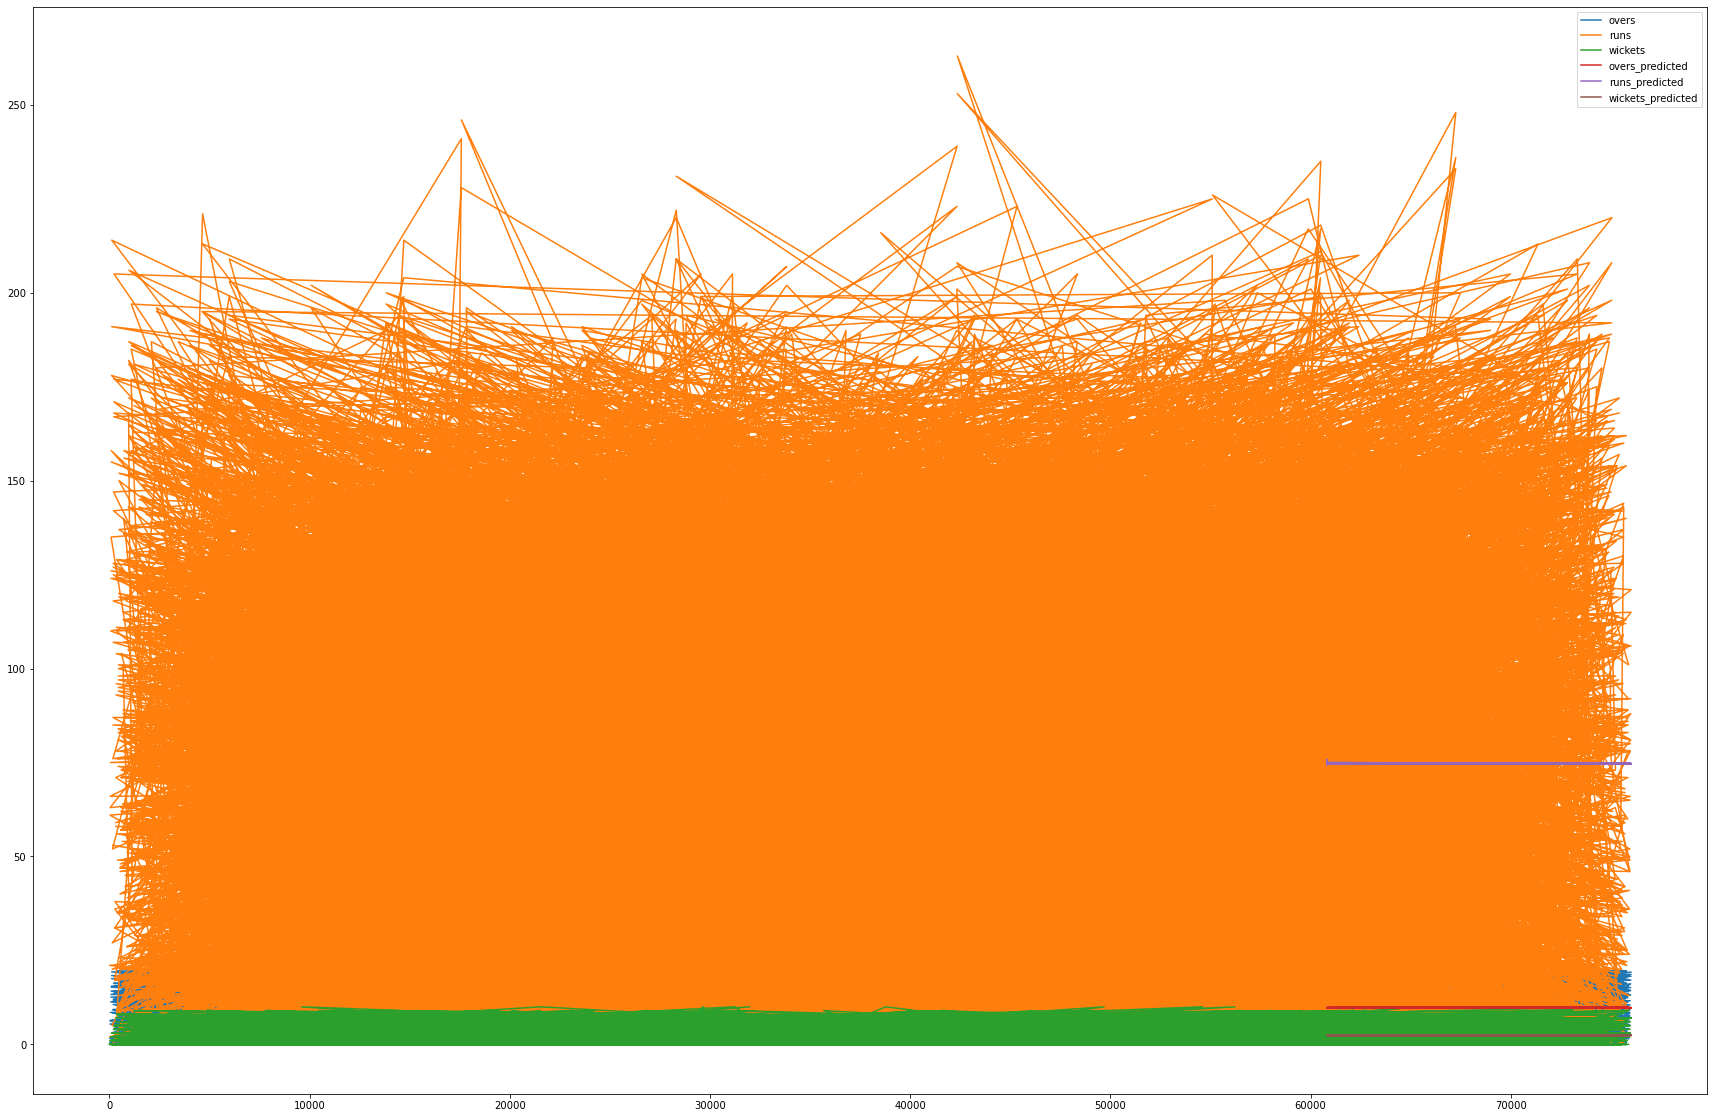

In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred.plot(figsize=(30,20))

TEST METRICS-RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_runs=math.sqrt(mean_squared_error(predictions['runs_predicted'],test_df['runs']))
print('Mean value of runs is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['runs']),rmse_runs))

rmse_wickets=math.sqrt(mean_squared_error(predictions['wickets_predicted'],test_df['wickets']))
print('Mean value of wickets is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['wickets']),rmse_wickets))

Mean value of runs is : 75.61547063079655. Root Mean Squared Error is :48.71011073538518
Mean value of wickets is : 2.429257383411169. Root Mean Squared Error is :1.993426418100525


In [ ]:
#rmse of runs is too high

In [ ]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs
0,14,6,12,315,201,1,0,0.1
1,14,6,12,315,201,1,0,0.2
2,14,6,12,315,201,2,0,0.2
3,14,6,12,315,201,2,0,0.3
4,14,6,12,315,201,2,0,0.4


In [ ]:
new_df=df[['overs','runs']]
new_df.head()

,overs,runs
0,0.1,1
1,0.2,1
2,0.2,2
3,0.3,2
4,0.4,2


In [ ]:
from sklearn.model_selection import train_test_split
#SPLITTING DATA
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (60811, 2)
Test set shape: (15203, 2)


VAR MODEL 2-CHANGES IN MAX LAGS PARAMETER

In [ ]:
#finding the lag that is best suitable
#max lag set = 120(20 overs)
model = VAR(train_df)
sorted_order=model.select_order(maxlags=120)
print(sorted_order.summary())

  VAR Order Selection (* highlights the minimums)  
        AIC         BIC         FPE         HQIC   
---------------------------------------------------
0         9.164      9.164*       9549.      9.164*
1        9.164*       9.165      9548.*       9.164
2         9.164       9.166       9549.       9.165
3         9.164       9.166       9549.       9.165
4         9.164       9.167       9550.       9.165
5         9.164       9.168       9551.       9.165
6         9.164       9.168       9551.       9.166
7         9.165       9.169       9552.       9.166
8         9.165       9.170       9553.       9.166
9         9.165       9.170       9553.       9.166
10        9.165       9.171       9554.       9.167
11        9.165       9.172       9555.       9.167
12        9.165       9.172       9556.       9.167
13        9.165       9.173       9557.       9.167
14        9.165       9.174       9558.       9.168
15        9.165       9.174       9558.       9.168
16        9.

In [ ]:
var_model = VARMAX(train_df, order=(1,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:      ['overs', 'runs']   No. Observations:                60811
Model:                         VAR(1)   Log Likelihood             -451193.153
                          + intercept   AIC                         902404.306
Date:                Sat, 24 Jun 2023   BIC                         902485.446
Time:                        13:50:50   HQIC                        902429.494
Sample:                             0                                         
                              - 60811                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):    3726.65, 12573.29
Prob(Q):                        0.99, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.00, 1.02   Skew:                       0.01, 0.43
Prob(H) (two-sided):            0.85,

In [ ]:
n_forecast = len(test_df)
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
test_df.head()

,overs,runs
12590,1.2,1
74893,14.3,131
56763,6.6,36
19428,13.5,104
30216,13.3,103


In [ ]:
predictions.columns=['overs_predicted','runs_predicted']
predictions

,overs_predicted,runs_predicted
60811,9.830356,75.340364
60812,9.761156,74.711272
60813,9.760715,74.707744
60814,9.760711,74.707710
60815,9.760711,74.707709
...,...,...
76009,9.760711,74.707709
76010,9.760711,74.707709
76011,9.760711,74.707709
76012,9.760711,74.707709


<AxesSubplot:>

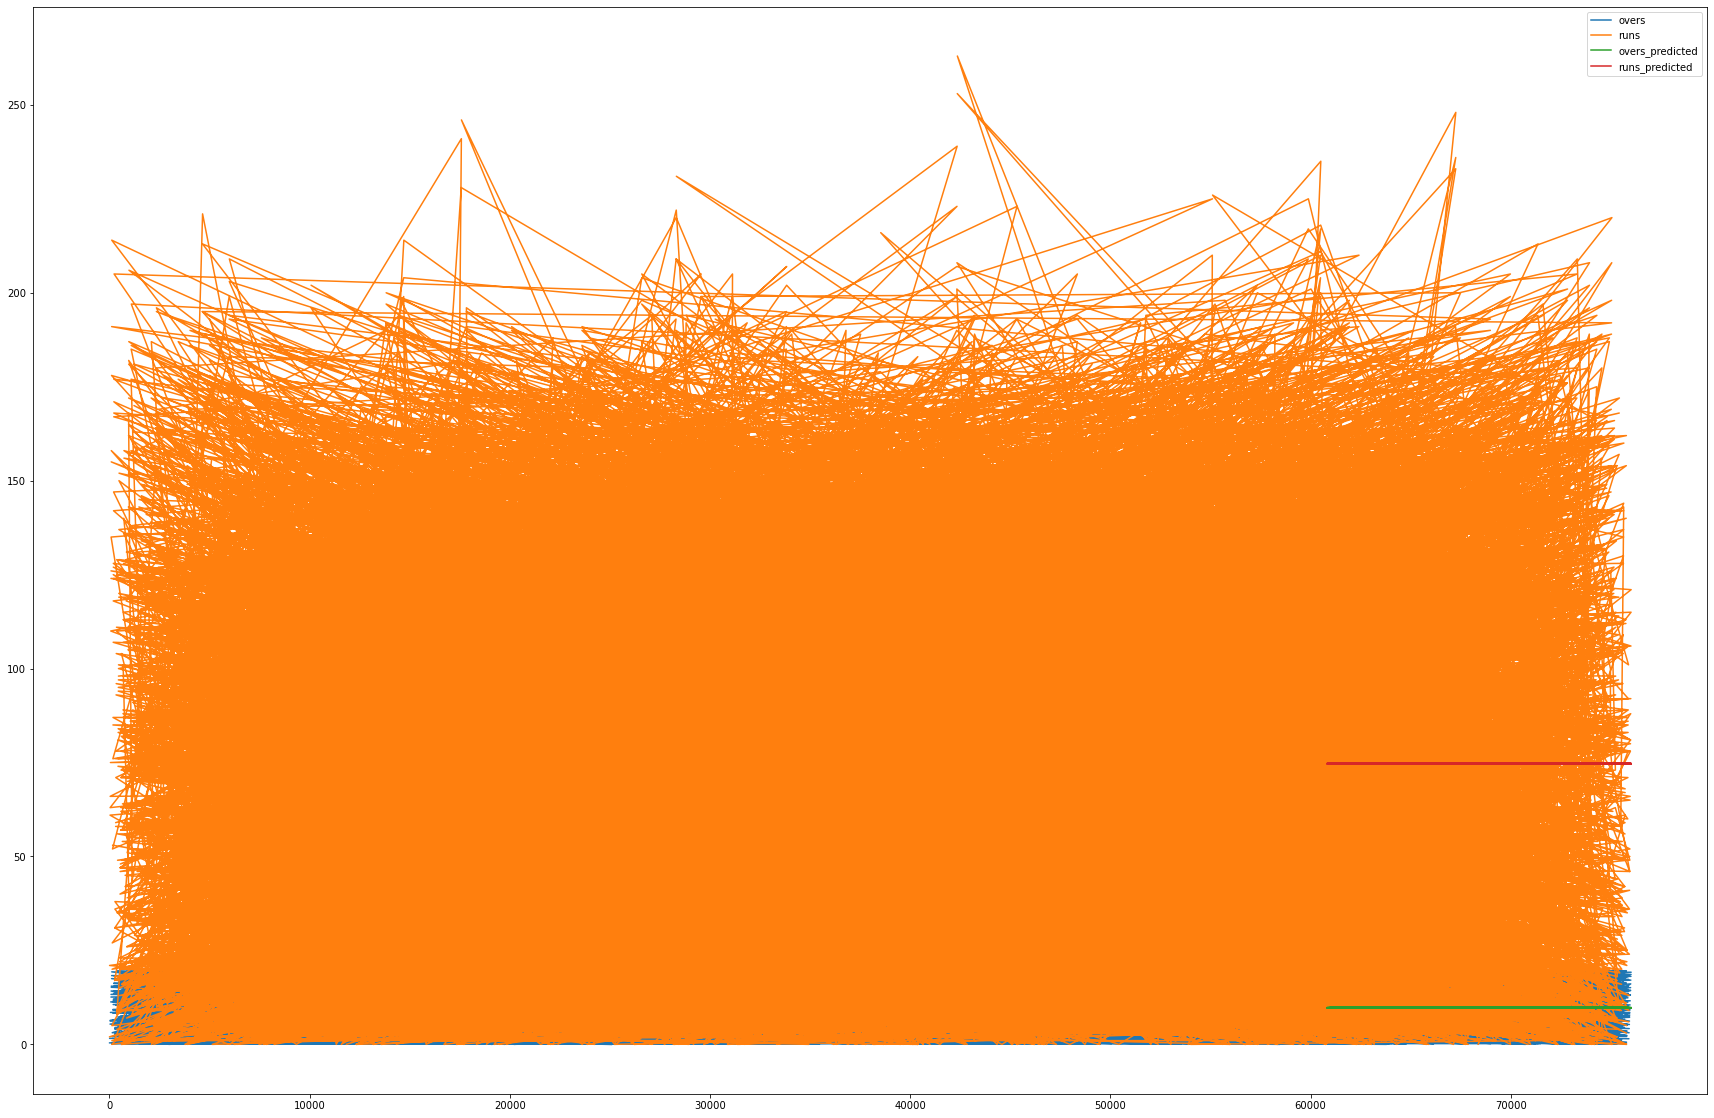

In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred.plot(figsize=(30,20))

TEST METRICS FOR SECOND VAR MODEL-RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_runs=math.sqrt(mean_squared_error(predictions['runs_predicted'],test_df['runs']))
print('Mean value of runs is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['runs']),rmse_runs))

Mean value of runs is : 75.61547063079655. Root Mean Squared Error is :48.710101772530656
